<a href="https://colab.research.google.com/github/rohan2RS/StockPricePridictor_AIML/blob/main/Stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt

stock = "NVDA"
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2025, 4, 30)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483066,0.486665,0.475386,0.483066,113680000
2015-01-05,0.474907,0.484505,0.472747,0.483066,197952000
2015-01-06,0.460508,0.476106,0.460028,0.475626,197764000
2015-01-07,0.459308,0.467947,0.457868,0.463868,321808000
2015-01-08,0.476586,0.479466,0.464348,0.464588,283780000


In [ ]:
df.shape

(2596, 5)

In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-04-23,102.702866,104.792724,102.012911,104.512737,247526000
2025-04-24,106.422607,106.532600,103.102838,103.472815,220815000
2025-04-25,111.002296,111.912229,105.722664,106.842582,251064700
2025-04-28,108.722450,110.362336,106.012632,109.682383,207708500
2025-04-29,109.012428,110.192347,107.432544,107.662524,170444300


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2596 entries, 2015-01-02 to 2025-04-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   2596 non-null   float64
 1   (High, NVDA)    2596 non-null   float64
 2   (Low, NVDA)     2596 non-null   float64
 3   (Open, NVDA)    2596 non-null   float64
 4   (Volume, NVDA)  2596 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 121.7 KB


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,2596.000000,2596.000000,2596.000000,2596.000000,2.596000e+03
mean,23.886436,24.340196,23.393509,23.893595,4.622729e+08
std,36.333888,37.057003,35.569004,36.385937,2.523406e+08
min,0.459308,0.467947,0.454509,0.463628,5.244800e+07
25%,3.617823,3.692661,3.556542,3.613715,2.994910e+08
50%,6.730235,6.857822,6.635758,6.742629,4.102935e+08
75%,22.949778,23.382713,22.453211,22.986247,5.549170e+08
max,149.405869,153.105279,147.796143,153.005289,3.692928e+09


In [ ]:
df = df.reset_index()

In [ ]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [ ]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2015-01-02,0.483066,0.486665,0.475386,0.483066,113680000
1,2015-01-05,0.474907,0.484505,0.472747,0.483066,197952000
2,2015-01-06,0.460508,0.476106,0.460028,0.475626,197764000
3,2015-01-07,0.459308,0.467947,0.457868,0.463868,321808000
4,2015-01-08,0.476586,0.479466,0.464348,0.464588,283780000


In [ ]:
data01 = df.to_csv('NVDA.csv')

In [ ]:
data01 = pd.read_csv('NVDA.csv')

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,NVDA,NVDA,NVDA,NVDA,NVDA
1,0,2015-01-02,0.4830656051635742,0.48666522499062737,0.4753864543418717,0.4830656051635742,113680000
2,1,2015-01-05,0.4749065339565277,0.48450547287555684,0.47274679057912694,0.4830656248859502,197952000
3,2,2015-01-06,0.46050819754600525,0.4761064277872669,0.46002825772152245,0.4756264879627841,197764000
4,3,2015-01-07,0.45930811762809753,0.4679471448331336,0.45786827022492566,0.46386758672647915,321808000


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data01['Date'],
                open=data01['Open'],
                high=data01['High'],
                low=data01['Low'],
                close=data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [ ]:
df = df.drop(['Date'], axis = 1)

/tmp/ipython-input-59-1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
0,0.483066,0.486665,0.475386,0.483066,113680000
1,0.474907,0.484505,0.472747,0.483066,197952000
2,0.460508,0.476106,0.460028,0.475626,197764000
3,0.459308,0.467947,0.457868,0.463868,321808000
4,0.476586,0.479466,0.464348,0.464588,283780000


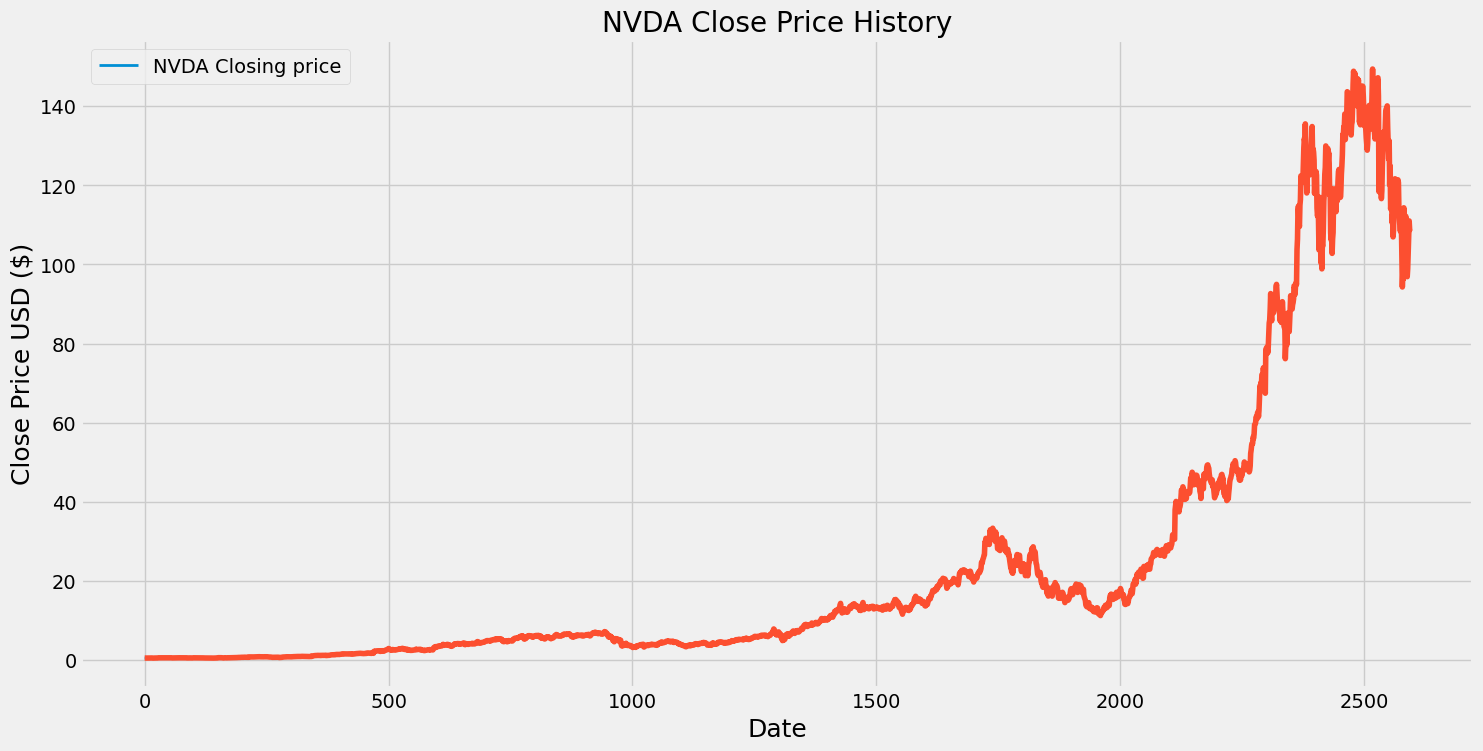

In [ ]:
from contextlib import closing
plt.figure(figsize = (16,8))
plt.plot(df['Close'], label = f'{stock} Closing price',linewidth = 2)
plt.title(f'{stock} Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.legend()
plt.show()

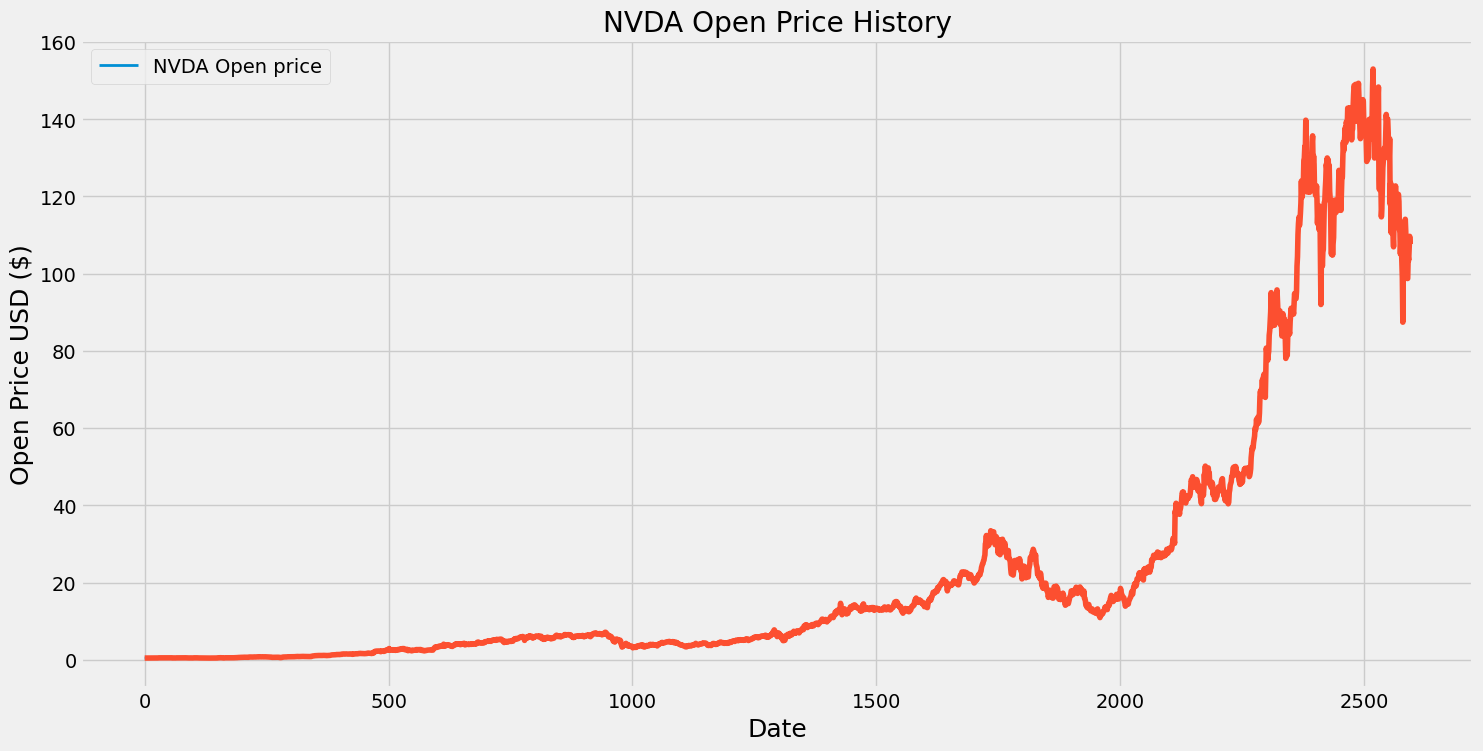

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df['Open'], label = f'{stock} Open price',linewidth = 2)
plt.title(f'{stock} Open Price History')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price USD ($)', fontsize = 18)
plt.legend()
plt.show()

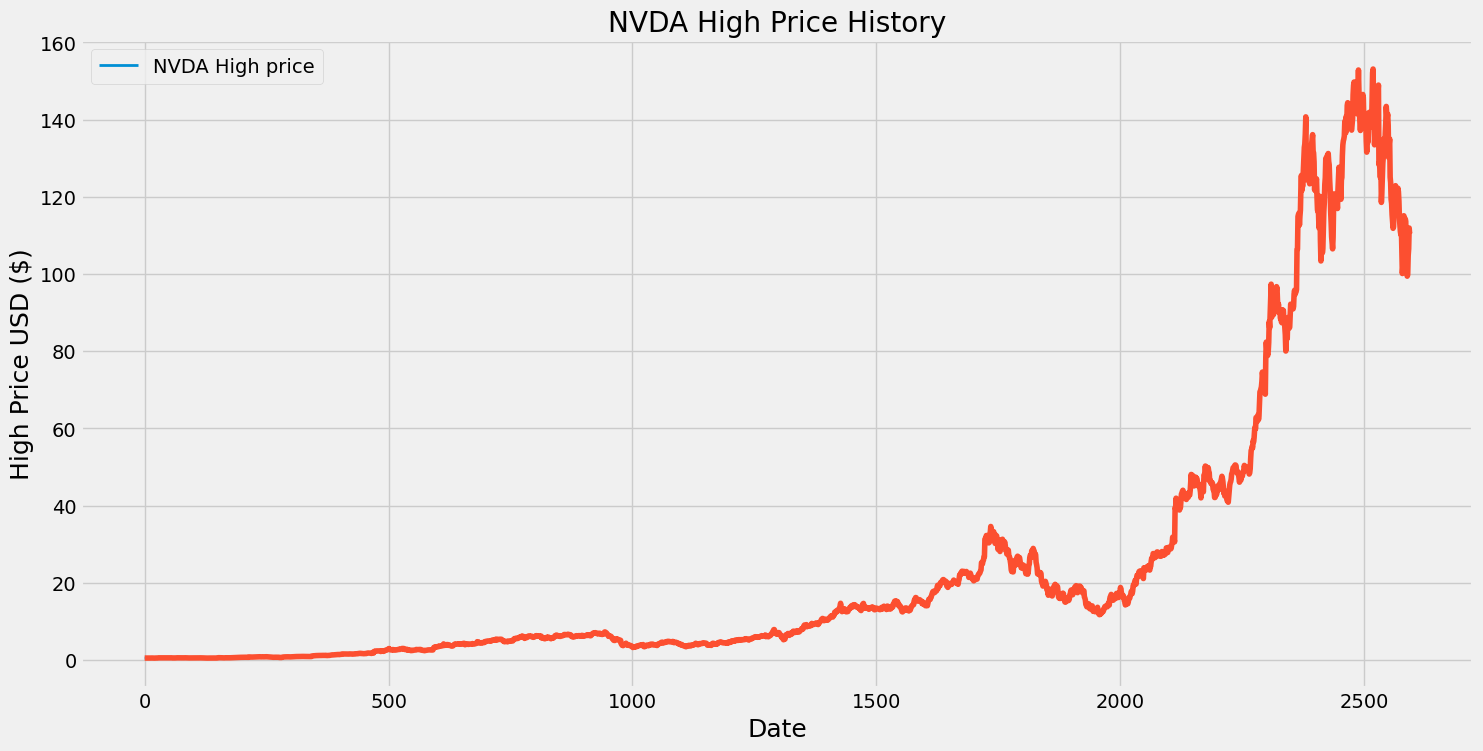

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df['High'], label = f'{stock} High price',linewidth = 2)
plt.title(f'{stock} High Price History')
plt.plot(df['High'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('High Price USD ($)', fontsize = 18)
plt.legend()
plt.show()

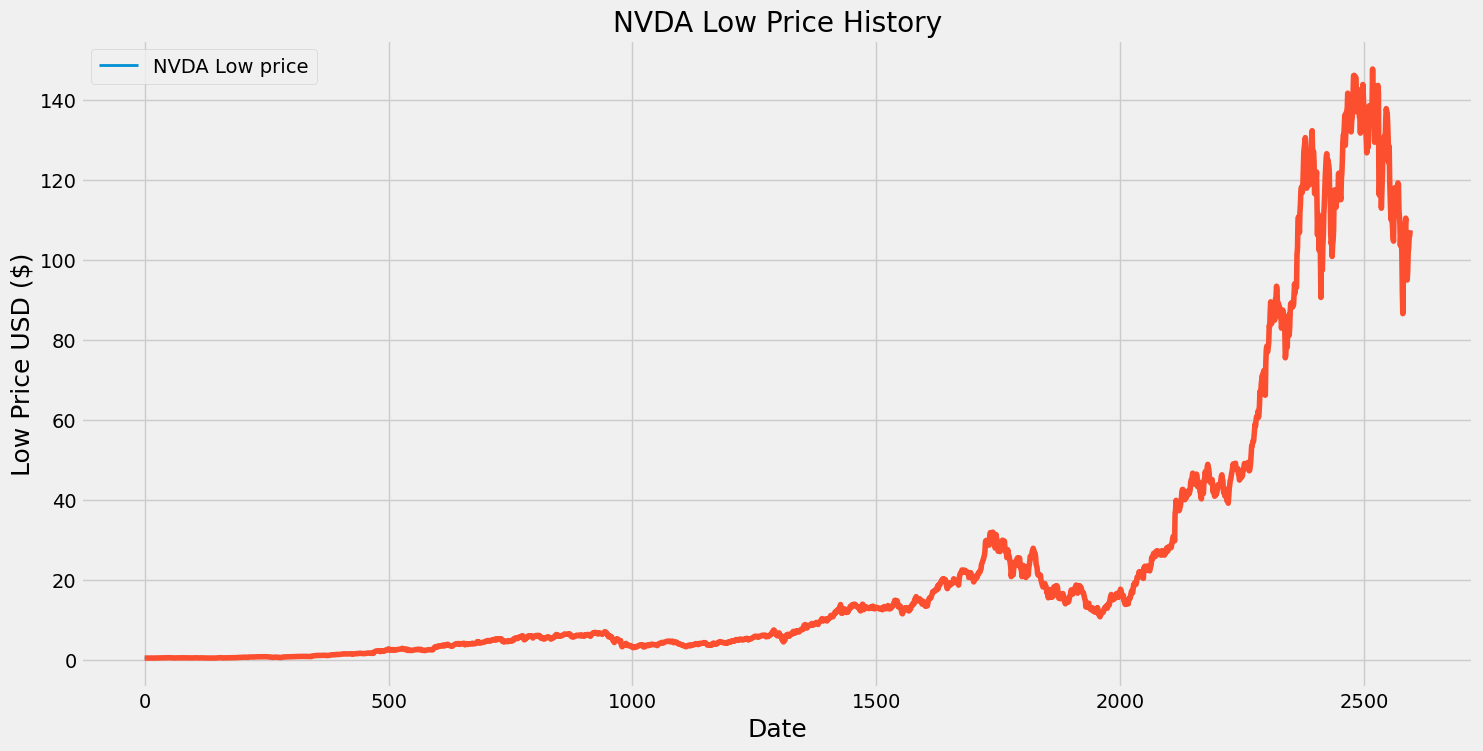

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df['Low'], label = f'{stock} Low price',linewidth = 2)
plt.title(f'{stock} Low Price History')
plt.plot(df['Low'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Low Price USD ($)', fontsize = 18)
plt.legend()
plt.show()

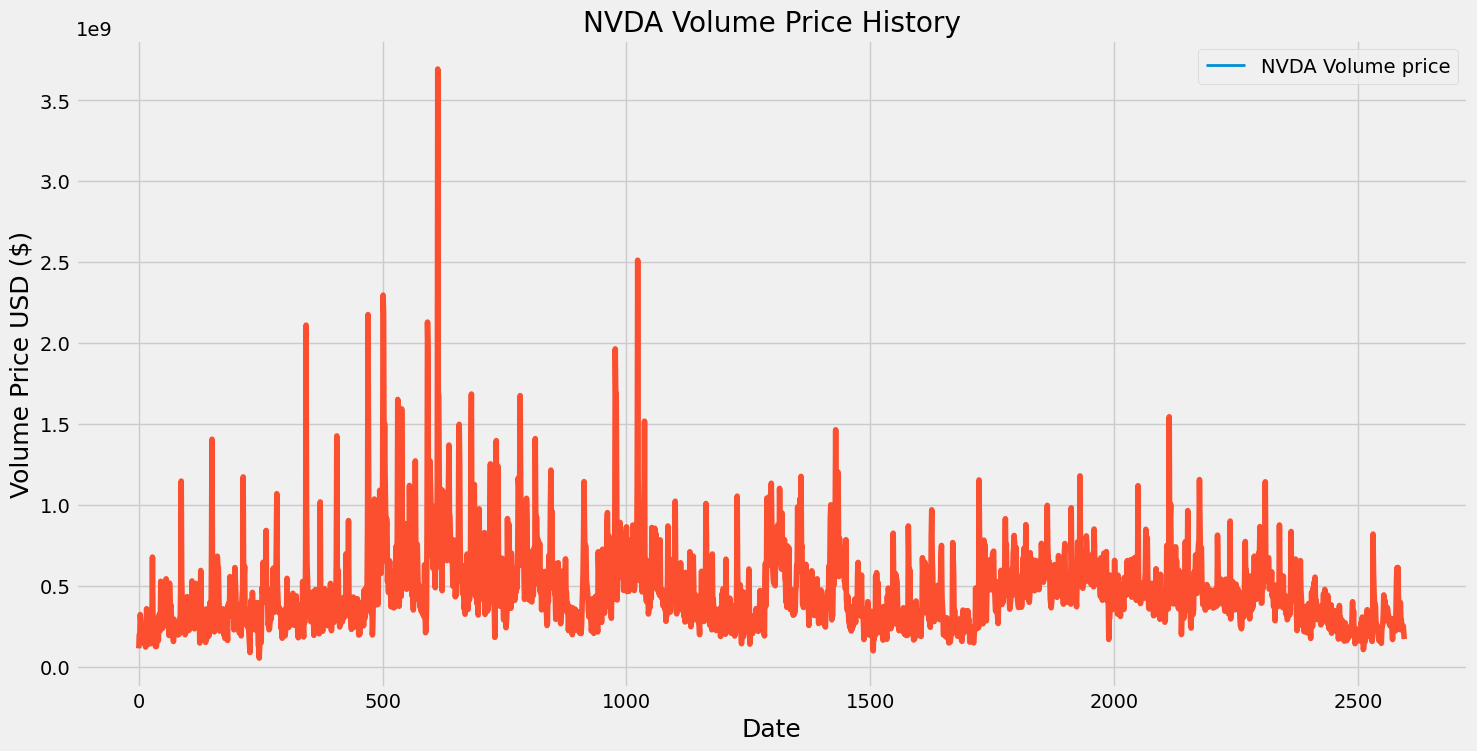

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df['Volume'], label = f'{stock} Volume price',linewidth = 2)
plt.title(f'{stock} Volume Price History')
plt.plot(df['Volume'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Volume Price USD ($)', fontsize = 18)
plt.legend()
plt.show()

In [ ]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [ ]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [ ]:
ma100= df.Close.rolling(100).mean()

In [ ]:
ma100

Ticker,NVDA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2591,125.657572
2592,125.352914
2593,125.109849
2594,124.814891


In [ ]:
ma200 = df.Close.rolling(200).mean()

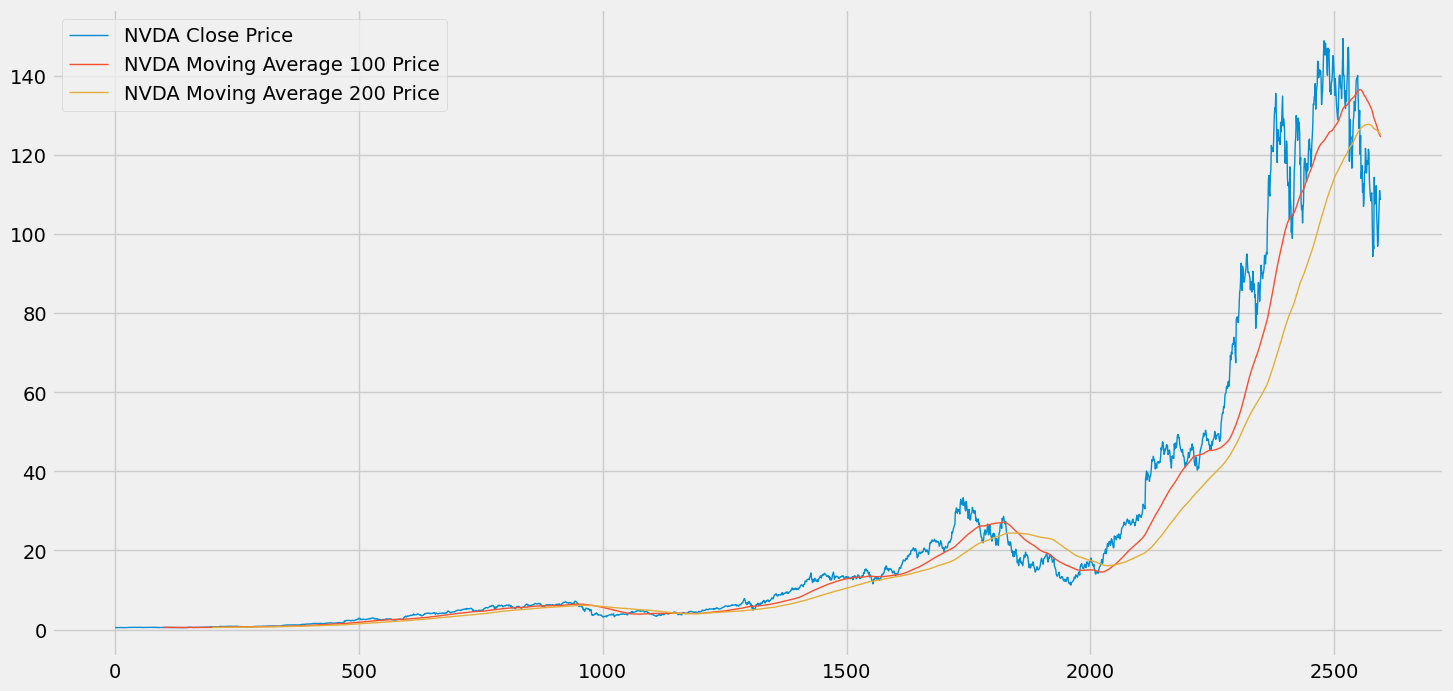

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [ ]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

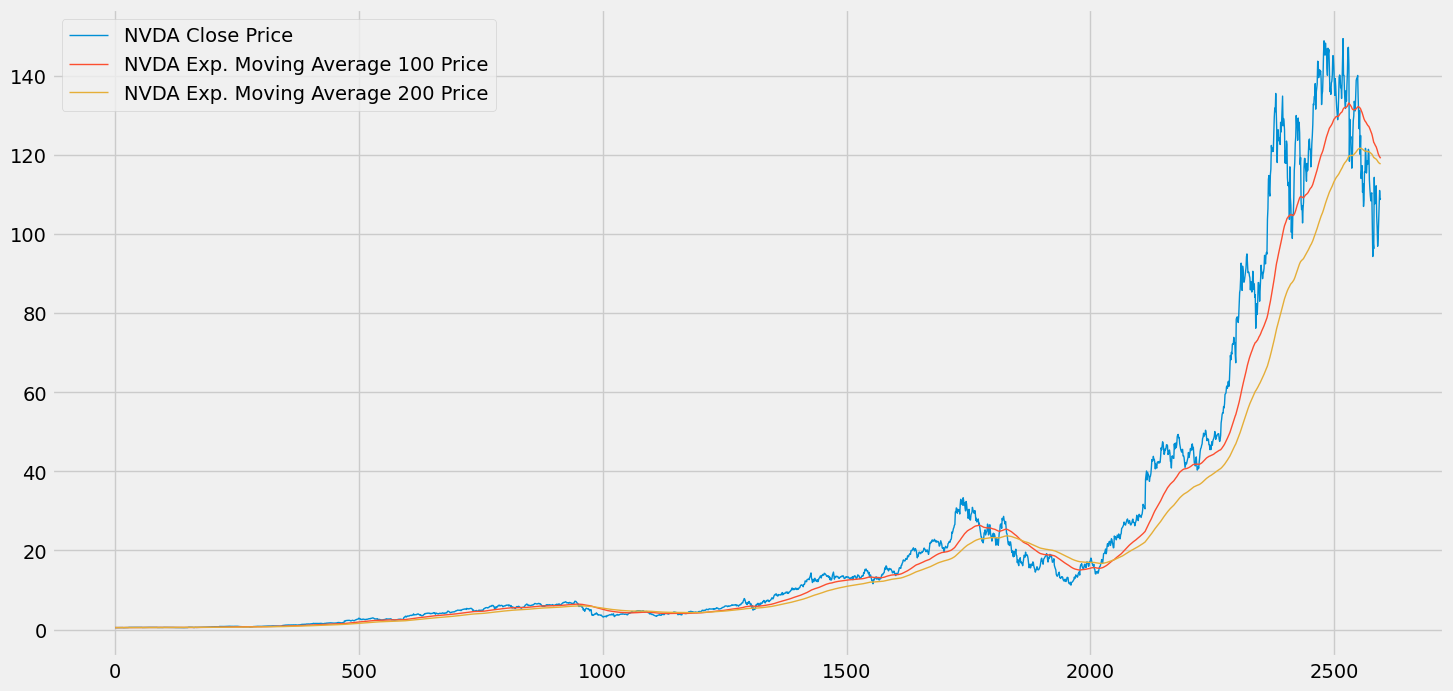

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

Data Traning

In [ ]:
! pip install tensorflow

In [ ]:
import keras.models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 295ms/step - loss: 0.0402
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - loss: 0.0049
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - loss: 0.0040
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - loss: 0.0039
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0040
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 350ms/step - loss: 0.0032
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - loss: 0.0033
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 316ms/step - loss: 0.0027
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - loss: 0.0029
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 311ms/step - loss: 0.0023
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 308ms/step - loss: 0.0031
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - loss: 0.0027
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 310ms/step - loss: 0.0036
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - loss: 0.0023
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step 

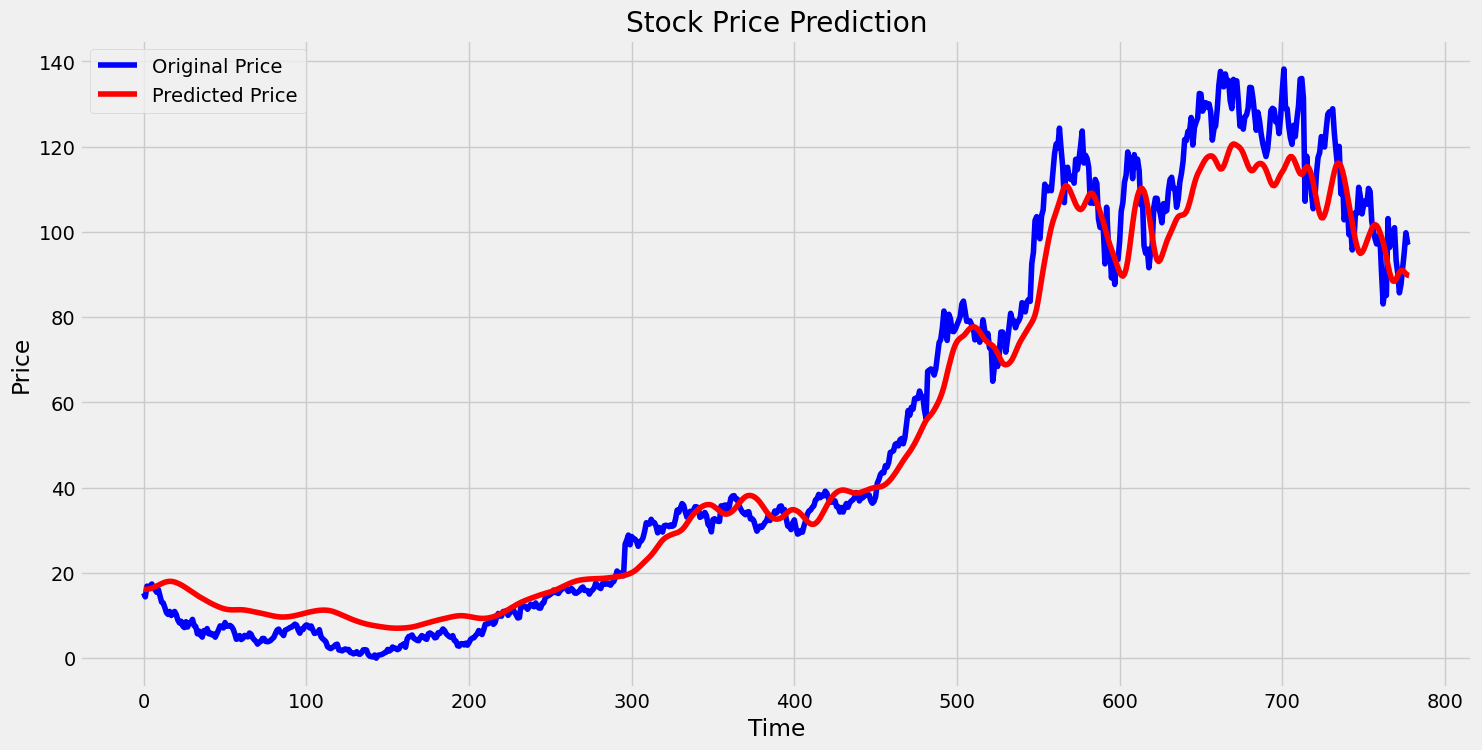

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import necessary metrics
import math # Import math for sqrt

# Prepare the data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)

# Split data into x_train and y_train
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

# Prepare testing data
past_100_days = data_training.tail(100)
# Use pd.concat() instead of the deprecated .append()
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Make predictions
y_predicted = model.predict(x_test)

# Inverse transform the predictions and actual values
# Note: scaler.scale_[0] is the scale factor for the first feature (and only feature in this case)
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse) # Or use mean_squared_error(y_test, y_predicted, squared=False) in newer sklearn versions
print(f'Root Mean Squared Error: {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predicted)
print(f'Mean Absolute Error: {mae}')


# Visualize the results
plt.figure(figsize=(16,8))
plt.plot(y_test, 'b', label='Original Price')
# Reshape y_predicted to match y_test for plotting if necessary (sometimes model.predict returns different shape)
# y_predicted = y_predicted.reshape(-1) # Uncomment if y_predicted has a different shape
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
model.save('lstm_model.h5')